Running test files... skipping GUI
Extracting data for patient: no_131
Interval for motion data: {'S': [2977, 4649], 'C': [8285, 9198], 'F': [12511, 13224], 'flag': {'auto': 1, 'S': 1, 'C': 1, 'F': 1}}
Interval for gravity data: [1922, 2959]
Extracting data for pace:  S


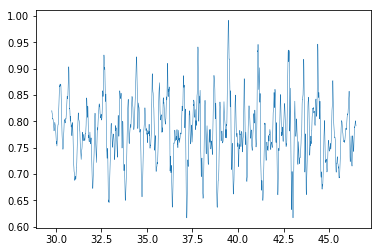

Extracting data for pace:  C


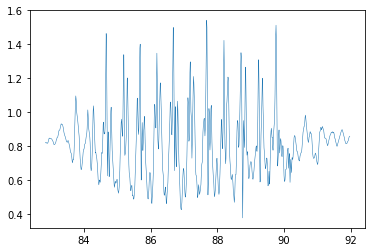

Extracting data for pace:  F


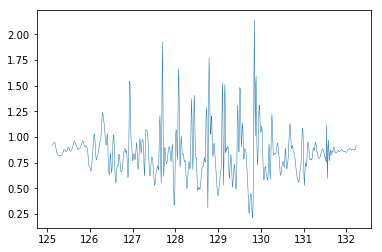

In [3]:
# %load analyze_data.py
####
# filename: analyze_data.py	
# by: Abhay Gupta
#
# date: 09/10/18
####

# Library imports
import os
import pickle
import time as clocktime

# Custom function imports
import matplotlib.pyplot as plt
from utils.math_functions.general_math import my_round

# Change plot line width
#plt.rcParams['lines.linewidth'] = 0.5

def open_files(directory):
	"""Open all data files needed for analysis"""

	data_file = os.path.join(directory, 'python_struct.pkl')
	data_window_file = os.path.join(directory, 'data_window.pkl')
	gravity_window_file = os.path.join(directory, 'gravity_window.pkl')
	with open(data_file, 'rb') as afile: 
		data = pickle.load(afile) # Import all patient data
	if data['Flags']['tailBone']['accel'] == 0:
		return(None, None, None)
	with open(data_window_file, 'rb') as afile:
		data_wdw = pickle.load(afile) # Import data windows
	with open(gravity_window_file, 'rb') as afile:
		grav_wdw = pickle.load(afile) # Import gravity windows
	
	return(data, data_wdw, grav_wdw)

def extract(directory):
	"""Find peaks and troughs of data"""

	# initialize variables
	pace = ['S', 'C', 'F']
	coordinates = ['x', 'y', 'z']

	# measure runtime
	start_time = clocktime.time() 

	# Extract Patient Number
	patient_number = directory[-6:]
	print("Extracting data for patient:", patient_number)

	# Open data_file, gravity_window, data_window
	data, data_wdw, grav_wdw = open_files(directory)
	if data == None:
		print('No data for patient')
		return
	
	# Take out acceleration and gyroscope data from tailbone
	accel_data = data['UR']['sensorData']['tailBone']['accel']['data']	
	gyro_data = data['UR']['sensorData']['tailBone']['gyro']['data']	

	#plt.figure()
	#plt.plot(accel_data['z'])
	#plt.figure()
	#plt.plot(gyro_data['z'])

	# Round all window coordinates
	for p in pace:
		for i in range(0,2):
			data_wdw[p][i] = my_round(data_wdw[p][i])
			grav_wdw[i] = my_round(grav_wdw[i])
	
	print('Interval for motion data:', data_wdw)
	print('Interval for gravity data:', grav_wdw)

	# Check if not enough data
	if data_wdw['F'][1] > len(gyro_data['x']):
		print("Not enough gyro data", data_wdw['F'][1], len(gyro_data['x']))
		return

	# Initialize variables
	accel = dict()
	gyro = dict()

	#plt.figure()
	#plt.plot(accel_data['x'])
	# Plot vertical lines at places of peaks and troughs
	#plt.axvline(data_wdw['S'][0], color = 'g', linestyle = '--')
	#plt.axvline(data_wdw['S'][1], color = 'b', linestyle = '--')


	save_data = {}

	# Iterate through slow, calm, fast paces
	for k, p in enumerate(pace):
		print("Extracting data for pace: ", p)

		if (data_wdw['flag']['F'] == 0):
			print('Not enough accel-data recorded')
			continue

		# cut data with windows
		for w in coordinates:
			accel[w] = accel_data[w][data_wdw[p][0]:data_wdw[p][1]]
			gyro[w] = gyro_data[w][data_wdw[p][0]:data_wdw[p][1]]
		gyro['sec'] = gyro_data['seconds'][data_wdw[p][0]:data_wdw[p][1]]
		accel['sec'] = accel_data['seconds'][data_wdw[p][0]:data_wdw[p][1]]	

		plt.figure()	
		plt.plot(accel['sec'], accel['x'])
		plt.show()


def input_check(directory, folder_type):
	"check if multiple patients"

	if (folder_type == 'n'):
		extract(directory)
	else:
		start_time = clocktime.time()
		# iterate through every patient file
		for c, filename in enumerate(os.listdir(directory)):
			if (c < 0):
				continue
			if filename == ".DS_Store":
				continue
			print(filename)

			print("Current patient iteration:", c)
			afile = os.path.join(directory, filename)
			extract(afile)

if __name__ == '__main__':
	print('Running test files... skipping GUI')

	#directory = '../../data_files/analyzed_data'
	#folder_type = 'y'
	directory = '../../data_files/analyzed_data/no_131'
	folder_type = 'n'

	input_check(directory, folder_type)

